In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [1]:
def Accuracy(y_true,y_pred):
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: float
    
    """
    correct_ones = 0
    for ground, pred in zip(y_true, y_pred):
        if ground == pred:
            correct_ones += 1
    accuracy = correct_ones / len(y_true)
    return accuracy

In [111]:
def Recall(y_true,y_pred):
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: float
    """
    true_positive_val = 0  
    false_negative_val = 0  
    for ground, pred in zip(y_true, y_pred):
        if ground == 1 and pred == 1:
            true_positive_val += 1
        elif ground == 1 :
            false_negative_val += 1
    recall = true_positive_val / (true_positive_val + false_negative_val) if (true_positive_val + false_negative_val) > 0 else 0.0
    return recall


In [116]:
def Precision(y_true,y_pred):
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: float
    """
    true_positive_val = 0 
    false_positive_val = 0 

    for ground, pred in zip(y_true, y_pred):
        if ground == 1 and pred == 1:
            true_positive_val += 1
        elif pred == 1:
            false_positive_val += 1

    # Calculate Precision
    precision = true_positive_val / (true_positive_val + false_positive_val) if (true_positive_val + false_positive_val) > 0 else 0.0

    return precision


In [6]:
def WCSS(Clusters):
    """
    :Clusters List[numpy.ndarray]
    :rtype: float
    """
    wcss = 0  # Initialize the WCSS value
    wcss_values = []
    # Iterate through each cluster
    for cluster in Clusters:
        # Calculate the centroid of the cluster
        centroid = np.mean(cluster, axis=0)
        
        # Calculate the sum of squared distances from each point in the cluster to the centroid
        cluster_wcss = np.sum((cluster - centroid) ** 2)
        
        # Add the cluster's WCSS to the total WCSS
        wcss_values.append(cluster_wcss)
        wcss += cluster_wcss

    cluster_range = range(1, 4) 
    plt.figure(figsize=(8, 4))
    plt.plot(cluster_range, wcss_values, marker='o', linestyle='-', color='b')
    plt.title('Elbow Plot')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.grid(True)
    plt.show()
    
    return wcss
    

In [7]:
def ConfusionMatrix(y_true,y_pred):
    
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: float
    """
    true_positive_val = 0  
    true_negative_val = 0  
    false_positive_val = 0  
    false_negative_val = 0  

    for ground, pred in zip(y_true, y_pred):
        
        if ground == 0 and pred == 0:
            true_negative_val += 1
        elif ground == 0 and pred == 1:
            false_positive_val += 1
        elif ground == 1 and pred == 0:
            false_negative_val += 1
        elif ground == 1 and pred == 1:
            true_positive_val += 1

    #confusion_matrix = [[true_positive_val, false_positive_val], [false_negative_val, true_negative_val]]
    confusion_matrix = [[false_negative_val, false_positive_val], [true_negative_val, true_positive_val]]

    sns.set(font_scale=1.4)
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(confusion_matrix,  fmt='g', cmap='Blues',annot=True, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title('Confusion Matrix')

    #Add rectangles for TP, TN, FP, and FN
    tp_rect = plt.Rectangle((1, 1), 1, 1, fill=False, edgecolor='green', lw=2)
    tn_rect = plt.Rectangle((1, 0), 1, 1, fill=False, edgecolor='green', lw=2)
    fp_rect = plt.Rectangle((0, 1), 1, 1, fill=False, edgecolor='red', lw=2)
    fn_rect = plt.Rectangle((0, 0), 1, 1, fill=False, edgecolor='red', lw=2)

    ax.add_patch(tp_rect)
    ax.add_patch(tn_rect)
    ax.add_patch(fp_rect)
    ax.add_patch(fn_rect)

    plt.show()

    return confusion_matrix


In [124]:
# def euclidean_distance(x1, x2):
#     return np.sum(np.abs(x2-x1))
def KNN(X_train,X_test,Y_train,k=3):
    """
    :type X_train: numpy.ndarray
    :type X_test: numpy.ndarray
    :type Y_train: numpy.ndarray
    
    :rtype: numpy.ndarray
    """
    y_predict = []

    X_train = np.array(X_train, dtype=float)
    Y_train = np.array(Y_train, dtype=float)
    X_test = np.array(X_test, dtype=float)

    print('Total Datapoints',len(X_test))
    i=0
    for x_test in X_test:
        i=i+1
        if(i%1000==0):
            print('DEBUG : Completed for datapoints : ',i)
        distances = [np.sum(np.abs(x_test-x_train)) for x_train in X_train]        
        k_indices = np.argsort(distances)[:k]    
        k_nearest_labels = [Y_train[i] for i in k_indices]        
        most_common = Counter(k_nearest_labels).most_common(1)
        y_predict.append(most_common[0][0])
    
    return np.array(y_predict)


In [11]:
def PCA(X_train,N):
    """
    :type X_train: numpy.ndarray
    :type N: int
    :rtype: numpy.ndarray
    """
     # Step 1: Standardize the data (mean centering)
    mean = np.mean(X_train, axis=0)
    standardized_data = X_train - mean

    # Step 2: Calculate the covariance matrix
    cov_matrix = np.cov(standardized_data, rowvar=False)

    # Step 3: Compute eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Step 4: Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Step 5: Select the top N eigenvectors (principal components)
    top_N_eigenvectors = eigenvectors[:, :N]

    # Step 6: Project the data onto the selected eigenvectors
    reduced_data = np.dot(standardized_data, top_N_eigenvectors)

    # Calculate the explained variance ratio
    explained_variance_ratio = eigenvalues[:N] / np.sum(eigenvalues)

    # Plot the explained variance ratio
    plt.figure(figsize=(8, 4))
    plt.bar(range(1, N + 1), explained_variance_ratio, align='center')
    plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio for Principal Components')
    plt.xticks(range(1, N + 1))
    plt.grid(True)
    plt.show()

    return reduced_data

In [95]:
    
def Kmeans(X_train,N):
    """
    :type X_train: numpy.ndarray
    :type N: int
    :rtype: List[numpy.ndarray]
    """
    k=N
    data = X_train
    max_iters = 100
        # Initialize cluster centers randomly
    np.random.seed(0)
    centers = data[np.random.choice(len(data), k, replace=False)]
    
    for i in range(max_iters):
        # Assign each data point to the nearest cluster
        distances = np.array([[euclidean_distance(data_point, center) for center in centers] for data_point in data])
        assignments = np.argmin(distances, axis=1)
        
        # Update cluster centers
        new_centers = np.array([data[assignments == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence
        if np.all(centers == new_centers):
            break
        
        centers = new_centers
    plt.figure(figsize=(8, 6))

    cluster_assignments = assignments
    cluster_centers = centers
    # Plot data points
    for i in range(k):
        plt.scatter(data[cluster_assignments == i, 0], data[cluster_assignments == i, 1], label=f'Cluster {i + 1}')
    
    # Plot cluster centers
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x', s=100, label='Cluster Centers')
    
    plt.title('K-means Clustering')
    # plt.xlim(0.55, 0.63)  # Set your desired range for the x-axis
    # plt.ylim(0.48, 0.60)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()
    return centers, assignments

In [151]:
def SklearnSupervisedLearning(X_train,Y_train,X_test):
    """
    :type X_train: numpy.ndarray
    :type X_test: numpy.ndarray
    :type Y_train: numpy.ndarray
    
    :rtype: List[numpy.ndarray] 
    """
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Create individual classifiers
    svm_classifier = SVC(kernel='linear')
    logistic_classifier = LogisticRegression()
    knn_classifier = KNeighborsClassifier()
    
    
    # Train the individual classifiers
    svm_classifier.fit(X_train, y_train)
    logistic_classifier.fit(X_train, y_train)
    knn_classifier.fit(X_train, y_train)

    y_pred = logistic_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy of Logistic regression : {accuracy:.2f}')
    print('Recall for Logistic regression : ',Recall(y_test,y_pred))
    print('Precision for Logistic regression : ',Precision(y_test,y_pred))
    print()

    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy of KNN : {accuracy:.2f}')
    print('Recall for KNN : ',Recall(y_test,y_pred))
    print('Precision for KNN : ',Precision(y_test,y_pred))
    print()

    y_pred = svm_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy of SVM : {accuracy:.2f}')
    print('Recall for SVM : ',Recall(y_test,y_pred))
    print('Precision for SVM : ',Precision(y_test,y_pred))
    print()

    ensemble_classifier = VotingClassifier(estimators=[
        ('svm', svm_classifier),
        ('logistic', logistic_classifier),
        ('knn', knn_classifier)
    ], voting='hard')
    
    print(ensemble_classifier)
    ensemble_classifier.fit(X_train, y_train)
    y_pred = ensemble_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Ensemble classifier accuracy : ',accuracy)

    
    
    kmeans_classifier = KMeans(n_clusters=3)
    clusters=kmeans_classifier.fit(X_train)
    print('K means clustering clusters : ',clusters)


In [137]:
def SVM_Plot(X_train, svm_classifier):

    # Define a mesh grid of points to plot the decision boundary
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    
    # Predict the class labels for the points in the mesh grid
    Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and the data points
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)  # Decision boundary
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k')  # Data points
    
    # Add labels and a title
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    
    # Show the plot
    plt.show()


In [155]:
def SklearnVotingClassifier(X_train,Y_train,X_test):
    
    """
    :type X_train: numpy.ndarray
    :type X_test: numpy.ndarray
    :type Y_train: numpy.ndarray
    
    :rtype: List[numpy.ndarray] 
    """
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Create individual classifiers
    svm_classifier = SVC(kernel='linear')
    logistic_classifier = LogisticRegression()
    knn_classifier = KNeighborsClassifier()
    
    # Train the individual classifiers
    svm_classifier.fit(X_train, y_train)
    logistic_classifier.fit(X_train, y_train)
    knn_classifier.fit(X_train, y_train)
    
    #SVM_Plot(X_train)
    
    # Create an ensemble model using a VotingClassifier
    ensemble_classifier = VotingClassifier(estimators=[
        ('svm', svm_classifier),
        ('logistic', logistic_classifier),
        ('knn', knn_classifier)
    ], voting='hard')
    
    print(ensemble_classifier)
    ensemble_classifier.fit(X_train, y_train)

    
    # Evaluate the classifiers and the ensemble model
    classifiers = {
        'SVM': svm_classifier,
        'Logistic Regression': logistic_classifier,
        'K-NN': knn_classifier,
        'Ensemble': ensemble_classifier
    }
    
    confusion_matrices = {}
    
    for name, classifier in classifiers.items():
        y_pred = classifier.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        cm2d = ConfusionMatrix(y_test, y_pred)
        confusion_matrices[name] = cm
    
    # Visualize the confusion matrices
    plt.figure(figsize=(15, 10))
    
    for i, (name, cm) in enumerate(confusion_matrices.items(), 1):
        plt.subplot(2, 2, i)
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix - {name}')
        plt.colorbar()
        tick_marks = np.arange(len(np.unique(y)))
        plt.xticks(tick_marks, np.unique(y))
        plt.yticks(tick_marks, np.unique(y))
        plt.xlabel('Predicted')
        plt.ylabel('True')
    
    plt.tight_layout()
    plt.show()
    

In [122]:
df=pd.read_csv('data.csv')
X_data = df['48']
Y_data = df.drop('48',axis = 'columns')

train_count = int(0.8*(len(X_data)))

X_train = X_data[:train_count]
X_test = X_data[train_count:]
Y_train = Y_data[:train_count]
Y_test = Y_data[train_count:]

print(np.shape(df))

(40956, 49)


In [123]:
    df=pd.read_csv('data.csv')
    df = df.dropna()

    df_min = df.min()
    df_max = df.max()
    df = (df-df_min)/(df_max-df_min)
    #df = df.sample(frac=1).reset_index(drop=True)

    
    Y_data = df['48']
    X_data = df.drop('48',axis = 'columns')
    print(np.shape(Y_data))
        
    train_count = int(0.7*(len(X_data)))
        
    X_train = X_data[:train_count]
    X_test = X_data[train_count:]
    Y_train = Y_data[:train_count]
    Y_test = Y_data[train_count:]
    y_test_val = Y_test.values
    y_train = Y_train
    print('Y Test values :\n',y_test_val)
    c=0
    match=0
    y_pred = []

(40956,)
Y Test values :
 [0.5 0.2 0.2 ... 0.7 1.  0.8]


In [125]:
y_pred = KNN(X_train,X_test,Y_train,2)
print('Accuracy for KNN : ',Accuracy(Y_test,y_pred))

Total Datapoints 12287
DEBUG : Completed for datapoints :  1000
DEBUG : Completed for datapoints :  2000
DEBUG : Completed for datapoints :  3000
DEBUG : Completed for datapoints :  4000
DEBUG : Completed for datapoints :  5000
DEBUG : Completed for datapoints :  6000
DEBUG : Completed for datapoints :  7000
DEBUG : Completed for datapoints :  8000
DEBUG : Completed for datapoints :  9000
DEBUG : Completed for datapoints :  10000
DEBUG : Completed for datapoints :  11000
DEBUG : Completed for datapoints :  12000
Accuracy for KNN :  0.9969886872304061


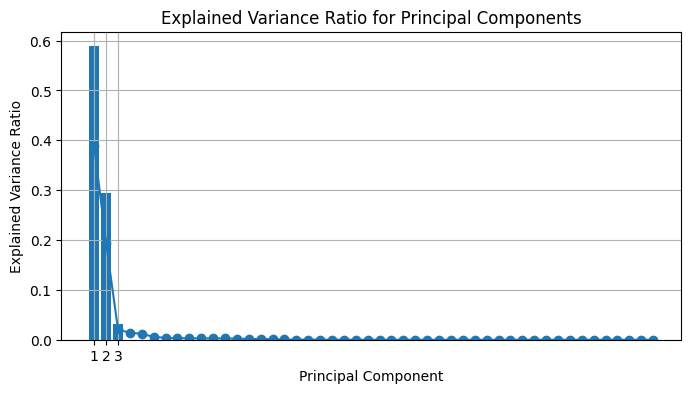

In [65]:
reduced_data = PCA(X_data, 3)

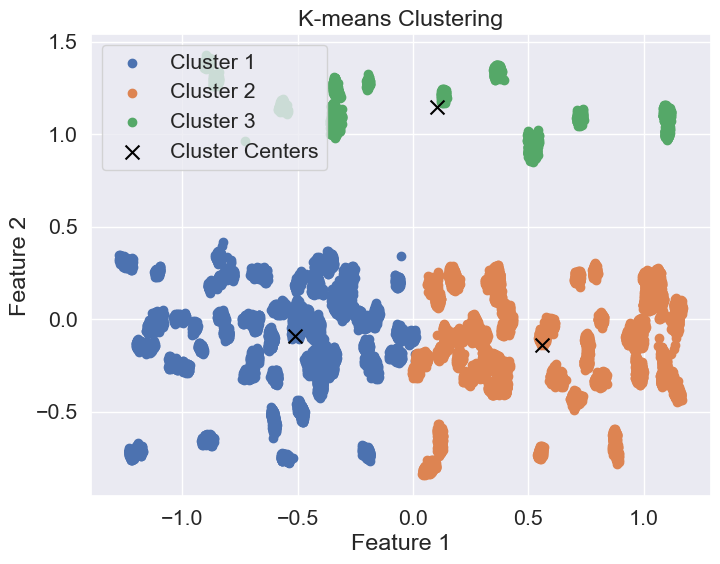

K means cluster centers:
[[-0.51297878 -0.09112855  0.01172371]
 [ 0.55810429 -0.14127596 -0.01403373]
 [ 0.10575491  1.14626008  0.0035797 ]]
K means cluster assignments:
[0 1 1 ... 1 2 1]


In [96]:
clusters=3
cluster_centers, cluster_assignments = Kmeans(reduced_data, clusters)
print("K means cluster centers:")
print(cluster_centers)
print("K means cluster assignments:")
print(cluster_assignments) 

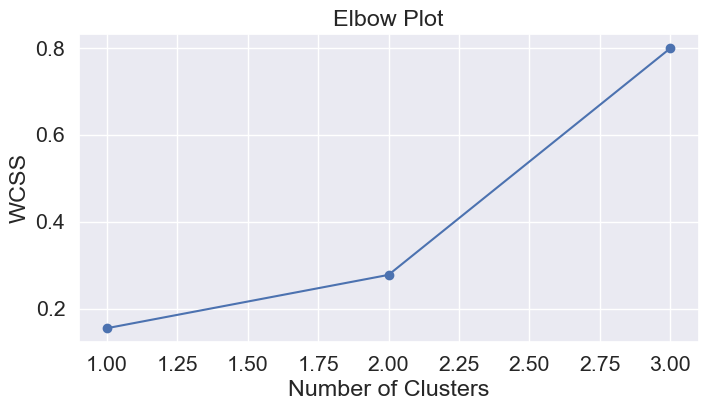

1.2317744479296338

In [98]:
WCSS(cluster_centers)

In [73]:
# PART 2

In [152]:
data = pd.read_csv('data.csv')

# Split the data into features (X) and target (y)
X = data.drop('48', axis=1)
y = data['48']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
SklearnSupervisedLearning(X_train, y_train, X_test)

C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic regression : 0.92
Recall for Logistic regression :  0.9481582537517054
Precision for Logistic regression :  0.946866485013624

Accuracy of KNN : 0.80
Recall for KNN :  0.781718963165075
Precision for KNN :  0.7109181141439206

Accuracy of SVM : 0.93
Recall for SVM :  0.9618008185538881
Precision for SVM :  0.9412550066755674

VotingClassifier(estimators=[('svm', SVC(kernel='linear')),
                             ('logistic', LogisticRegression()),
                             ('knn', KNeighborsClassifier())])


C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble classifier accuracy :  0.9302978515625


C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K means clustering clusters :  KMeans(n_clusters=3)


C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('svm', SVC(kernel='linear')),
                             ('logistic', LogisticRegression()),
                             ('knn', KNeighborsClassifier())])


C:\Users\skpra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


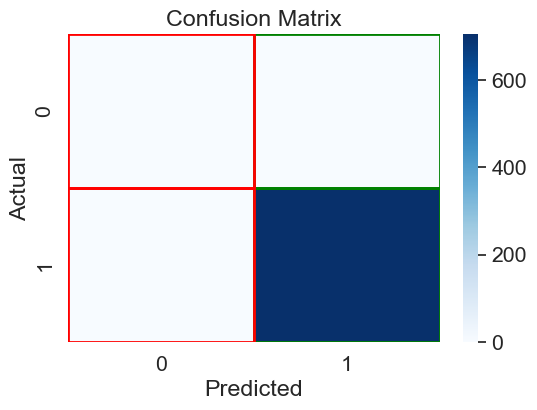

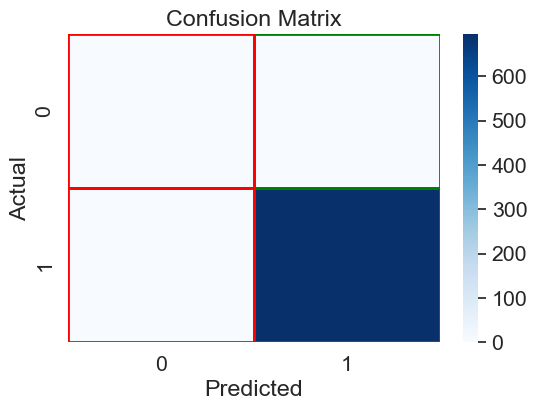

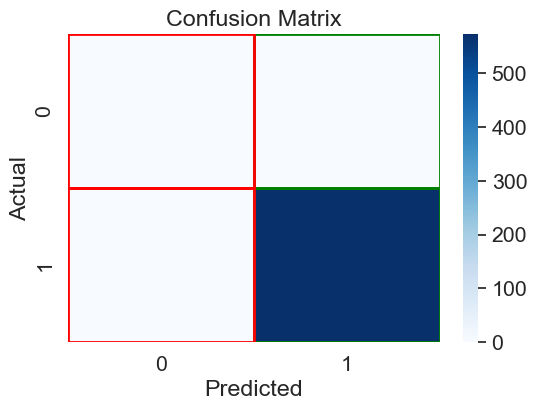

In [ ]:
SklearnVotingClassifier(X_train, y_train, X_test)